In [22]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib as mlt
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import seaborn as sns
from IPython.display import Image
import quandl as quandl
quandl.ApiConfig.api_key = ''
%config InlineBackend.figure_format = 'svg'
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [78]:
quandl.bulkdownload('BCHAIN')
temp = pd.read_csv('BCHAIN/BCHAIN_20200913.csv', header= None, names=['name', 'date', 'value'], parse_dates=['date'])

In [135]:
df = temp.pivot(index='date', columns='name', values='value')
df.head()

name        ATRCT     AVBLS  BCDDC  BCDDE  BCDDM  BCDDW  BCDDY  BLCHS  CPTRA  \
date                                                                           
2009-01-03    0.0  0.000272    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2009-01-04    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2009-01-05    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2009-01-06    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2009-01-07    0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

name        CPTRV  ...  NTRAN  NTRAT  NTRBL  NTREP  TOTBC  TOUTV  TRFEE  \
date               ...                                                    
2009-01-03    0.0  ...    1.0    1.0    1.0    1.0   50.0   50.0    0.0   
2009-01-04    0.0  ...    0.0    1.0    1.0    0.0   50.0    0.0    0.0   
2009-01-05    0.0  ...    0.0    1.0    1.0    0.0   50.0    0.0    0.0   
2009-01-06    0.0  ...    0.0    1.0    1.0    0.0   50.0    0.0    0.0   
2009-01-07    0.0  ...    0.0    1.0    1.0    0.0   50.0    0.0    0.0   

name        TRFUS  TRVOU  TVTVR  
date                             
2009-01-03    0.0    0.0    0.0  
2009-01-04    0.0    0.0    0.0  
2009-01-05    0.0    0.0    0.0  
2009-01-06    0.0    0.0    0.0  
2009-01-07    0.0    0.0    0.0  

[5 rows x 33 columns]

In [162]:
df.describe().T.round(3)

count          mean           std           min           25%  \
name                                                                    
ATRCT  3504.0  6.769000e+00  5.216000e+00  0.000000e+00  0.000000e+00   
AVBLS  4272.0  4.650000e-01  4.410000e-01  0.000000e+00  2.000000e-02   
BCDDC  2756.0  3.831027e+09  3.756570e+09  0.000000e+00  2.133639e+08   
BCDDE  2756.0  4.268389e+06  7.812780e+06  0.000000e+00  5.299470e+05   
BCDDM  2756.0  3.761201e+06  7.657626e+06  0.000000e+00  3.242160e+05   
BCDDW  2756.0  4.064165e+06  7.753399e+06  0.000000e+00  4.688145e+05   
BCDDY  2756.0  1.874889e+06  6.447294e+06  0.000000e+00  0.000000e+00   
BLCHS  4272.0  7.342737e+04  9.046372e+04  0.000000e+00  5.472500e+02   
CPTRA  4272.0  2.122700e+01  2.564500e+01  0.000000e+00  3.634000e+00   
CPTRV  4272.0  1.479691e+04  6.418160e+05  0.000000e+00  1.034000e+00   
DIFF   4272.0  2.228838e+12  4.464960e+12  0.000000e+00  1.497965e+06   
ETRAV  4272.0  1.696669e+05  2.316659e+05  0.000000e+00  7.167676e+04   
ETRVU  4272.0  3.744465e+08  6.646672e+08  0.000000e+00  7.633122e+05   
HRATE  4271.0  1.629857e+07  3.257689e+07  0.000000e+00  1.067300e+01   
MIOPM  2722.0 -4.623420e+08  8.828042e+08 -2.147484e+09 -1.747542e+05   
MIREV  4272.0  4.508635e+06  7.095185e+06  0.000000e+00  4.115233e+04   
MKPRU  4273.0  2.296492e+03  3.642954e+03  0.000000e+00  5.450000e+00   
MKTCP  4272.0  3.978156e+10  6.436301e+10  0.000000e+00  4.633473e+07   
MWNTD  4236.0  3.407732e+04  3.370058e+04  0.000000e+00  0.000000e+00   
MWNUS  4248.0  1.098110e+07  1.557089e+07  2.000000e+00  1.175000e+01   
MWTRV  4236.0  8.316494e+04  2.299592e+05  0.000000e+00  0.000000e+00   
NADDU  4271.0  2.478042e+05  2.362339e+05  0.000000e+00  1.247550e+04   
NETDF  2753.0 -6.680432e+05  9.216309e+05 -5.068846e+06 -1.112006e+06   
NTRAN  4272.0  1.329371e+05  1.249448e+05  0.000000e+00  6.986000e+03   
NTRAT  4272.0  1.407466e+08  1.709468e+08  1.000000e+00  1.988054e+06   
NTRBL  4272.0  8.908020e+02  8.487390e+02  1.000000e+00  4.800000e+01   
NTREP  4272.0  1.253172e+05  1.232048e+05  0.000000e+00  5.884500e+03   
TOTBC  4271.0  1.185453e+07  5.596292e+06  5.000000e+01  7.821325e+06   
TOUTV  4272.0  1.339027e+06  1.995179e+06  0.000000e+00  4.479261e+05   
TRFEE  4272.0  5.183300e+01  1.005470e+02  0.000000e+00  7.151000e+00   
TRFUS  4272.0  2.729317e+05  1.157109e+06  0.000000e+00  4.401600e+01   
TRVOU  4273.0  1.134578e+08  2.958240e+08  0.000000e+00  2.309887e+05   
TVTVR  2753.0  1.219500e+01  1.922700e+01  0.000000e+00  1.166000e+00   

                50%           75%           max  
name                                             
ATRCT  7.667000e+00  9.881000e+00  4.773300e+01  
AVBLS  2.950000e-01  9.090000e-01  1.422000e+00  
BCDDC  2.432947e+09  7.216988e+09  1.177605e+10  
BCDDE  2.530878e+06  5.004635e+06  1.732980e+08  
BCDDM  1.966104e+06  4.190439e+06  1.727464e+08  
BCDDW  2.287534e+06  4.696996e+06  1.730718e+08  
BCDDY  4.491245e+05  1.683390e+06  1.702367e+08  
BLCHS  2.399300e+04  1.361402e+05  2.989237e+05  
CPTRA  9.049000e+00  3.338600e+01  1.616860e+02  
CPTRV  1.817000e+00  4.482000e+00  3.650000e+07  
DIFF   3.945767e+10  1.123863e+12  1.755799e+13  
ETRAV  1.449055e+05  2.279746e+05  5.825066e+06  
ETRVU  5.602740e+07  5.162866e+08  5.760245e+09  
HRATE  2.727368e+05  8.652527e+06  1.517621e+08  
MIOPM -7.506000e+03  3.900000e+01  9.900000e+01  
MIREV  1.158828e+06  6.834601e+06  5.319158e+07  
MKPRU  3.539500e+02  3.751668e+03  1.949868e+04  
MKTCP  4.840980e+09  6.491014e+10  3.265254e+11  
MWNTD  2.787100e+04  6.155875e+04  1.284130e+05  
MWNUS  2.410292e+06  1.761402e+07  5.358763e+07  
MWTRV  2.091110e+04  1.050307e+05  8.484600e+06  
NADDU  1.765330e+05  4.633005e+05  1.072861e+06  
NETDF -9.128503e+04 -2.208842e+03  0.000000e+00  
NTRAN  8.156700e+04  2.462682e+05  4.906440e+05  
NTRAT  5.094556e+07  2.611732e+08  5.674407e+08  
NTRBL  5.400000e+02  1.680967e+03  2.762541e+03  
NTREP  7.547650e+04  2.395882e+05  4.706500e+05  
TO

In [180]:
## Normalizing the data after taking log of all values 

temp = np.log(df)
temp = temp.replace([np.inf, -np.inf], 0)
df_normalized = (temp - temp.mean())/temp.std()
df_normalized

name           ATRCT     AVBLS     BCDDC     BCDDE     BCDDM     BCDDW  \
date                                                                     
2009-01-03 -1.474559 -1.986513 -5.537607 -2.702035 -2.184484 -2.441472   
2009-01-04 -1.474559  0.817103 -5.537607 -2.702035 -2.184484 -2.441472   
2009-01-05 -1.474559  0.817103 -5.537607 -2.702035 -2.184484 -2.441472   
2009-01-06 -1.474559  0.817103 -5.537607 -2.702035 -2.184484 -2.441472   
2009-01-07 -1.474559  0.817103 -5.537607 -2.702035 -2.184484 -2.441472   
...              ...       ...       ...       ...       ...       ...   
2020-09-10       NaN  0.877810       NaN       NaN       NaN       NaN   
2020-09-11       NaN  0.915336       NaN       NaN       NaN       NaN   
2020-09-12       NaN  0.914124       NaN       NaN       NaN       NaN   
2020-09-13       NaN  0.837174       NaN       NaN       NaN       NaN   
2020-09-14       NaN       NaN       NaN       NaN       NaN       NaN   

name          BCDDY     BLCHS     CPTRA     CPTRV  ...     NTRAN     NTRAT  \
date                                               ...                       
2009-01-03 -1.48335 -1.912153 -1.598156 -0.643029  ... -3.755484 -4.811874   
2009-01-04 -1.48335 -1.912153 -1.598156 -0.643029  ... -3.755484 -4.811874   
2009-01-05 -1.48335 -1.912153 -1.598156 -0.643029  ... -3.755484 -4.811874   
2009-01-06 -1.48335 -1.912153 -1.598156 -0.643029  ... -3.755484 -4.811874   
2009-01-07 -1.48335 -1.912153 -1.598156 -0.643029  ... -3.755484 -4.811874   
...             ...       ...       ...       ...  ...       ...       ...   
2020-09-10      NaN  0.977640  0.883123 -0.843117  ...  0.853458  1.049760   
2020-09-11      NaN  0.977777  0.878791 -0.804978  ...  0.887768  1.049922   
2020-09-12      NaN  0.977939  0.858115 -0.915048  ...  0.845815  1.050099   
2020-09-13      NaN  0.978080  0.996181 -0.463442  ...  0.836037  1.050257   
2020-09-14      NaN       NaN       NaN       NaN  ...       NaN       NaN   

name           NTRBL     NTREP      TOTBC     TOUTV     TRFEE     TRFUS  \
date                                                                      
2009-01-03 -1.985545 -3.708772 -11.190956 -4.672718 -1.348808 -1.501352   
2009-01-04 -1.985545 -3.708772 -11.190956 -6.646487 -1.348808 -1.501352   
2009-01-05 -1.985545 -3.708772 -11.190956 -6.646487 -1.348808 -1.501352   
2009-01-06 -1.985545 -3.708772 -11.190956 -6.646487 -1.348808 -1.501352   
2009-01-07 -1.985545 -3.708772 -11.190956 -6.646487 -1.348808 -1.501352   
...              ...       ...        ...       ...       ...       ...   
2020-09-10  0.873373  0.902281   0.669242  0.909054  0.888614  1.192076   
2020-09-11  0.886665  0.937103   0.669286  0.955085  0.994825  1.236415   
2020-09-12  0.894173  0.894523   0.669330  0.899722  0.920898  1.206777   
2020-09-13  0.806267  0.885564   0.669385  0.804857  0.675178  1.113178   
2020-09-14       NaN       NaN        NaN       NaN       NaN       NaN   

name           TRVOU     TVTVR  
date                            
2009-01-03 -2.172229 -1.241183  
2009-01-04 -2.172229 -1.241183  
2009-01-05 -2.172229 -1.241183  
2009-01-06 -2.172229 -1.241183  
2009-01-07 -2.172229 -1.241183  
...              ...       ...  
2020-09-10  0.845588       NaN  
2020-09-11  0.760530       NaN  
2020-09-12  0.801650       NaN  
2020-09-13  0.743261       NaN  
2020-09-14  0.654141       NaN  

[4273 rows x 33 columns]

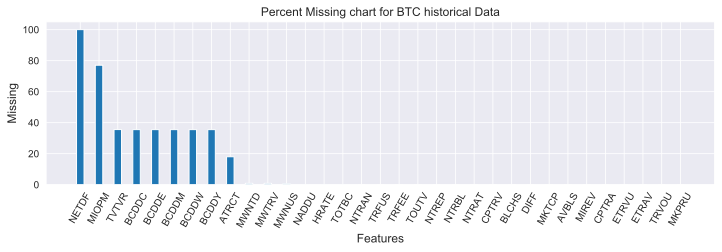

In [181]:
## Calculating missing % of all the variables in btc data set

miss_per = pd.DataFrame(df_normalized.isnull().sum(axis =0)*100/df_normalized.shape[0], columns=['Missing %']).round(2).sort_values(by=['Missing %'], ascending=False)
plt.figure(figsize=(12,3))
plt.xticks(rotation=60)
plt.title('Percent Missing chart for BTC historical Data')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
_ = plt.bar(x = miss_per.index, height=miss_per['Missing %'], width=0.4)

(9.0, 0.0)

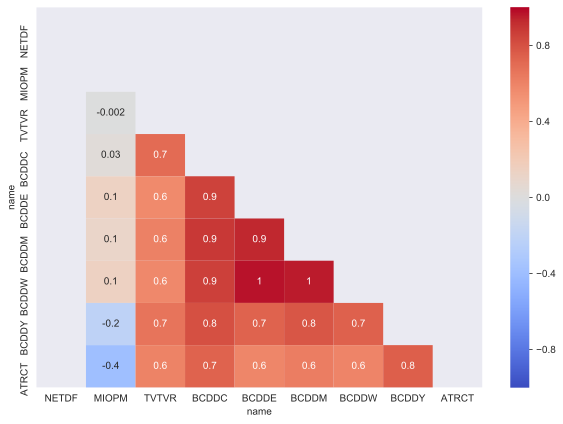

In [183]:
## Plotting heatmap of all those variables where missing % is greater the 20%.
plt.figure(figsize = (10,7))
df1 = df_normalized[miss_per[miss_per['Missing %'] >= 2].index]
mask = np.triu(df1.corr())
ax = sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g', mask = mask )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(24.0, 0.0)

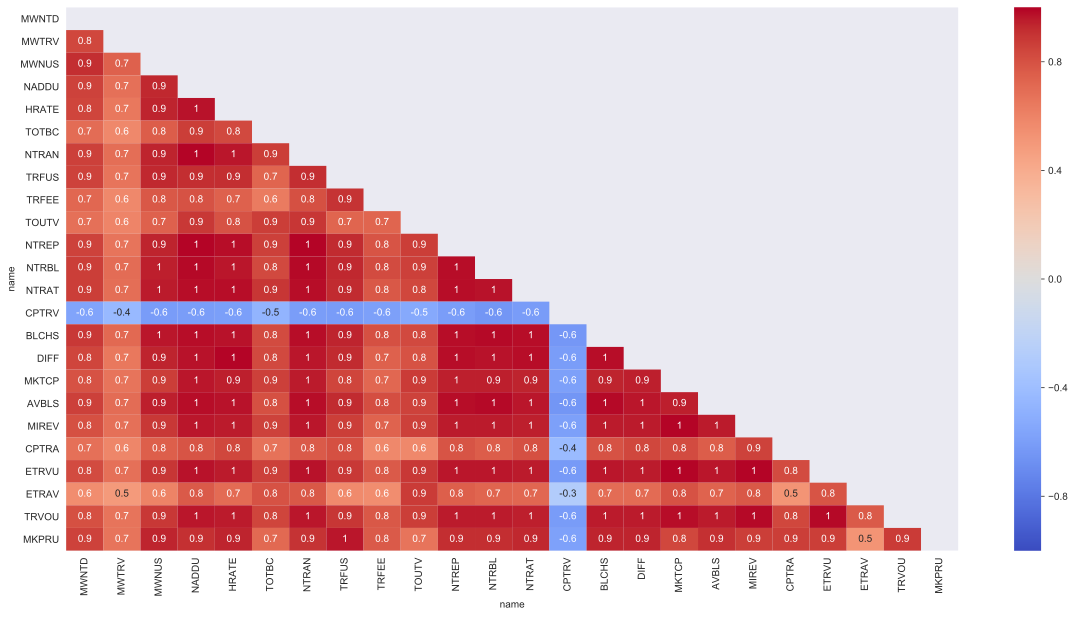

In [184]:
## Plotting heatmap of all those variables where missing % is less the 20%.

plt.figure(figsize = (20,10))
df1 = df_normalized[miss_per[miss_per['Missing %'] < 2].index]
mask = np.triu(df1.corr())
ax = sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g', mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

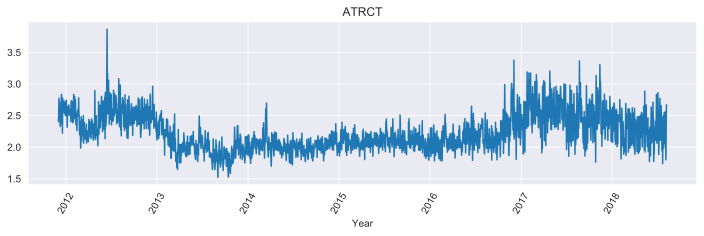

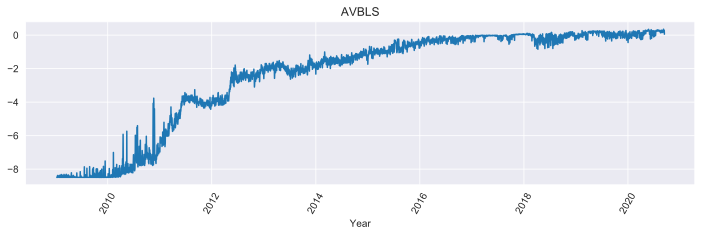

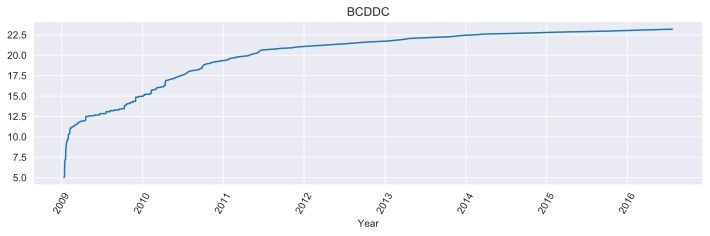

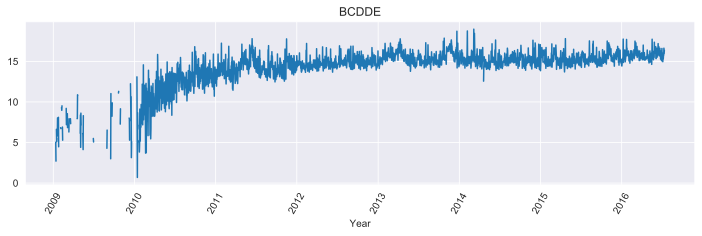

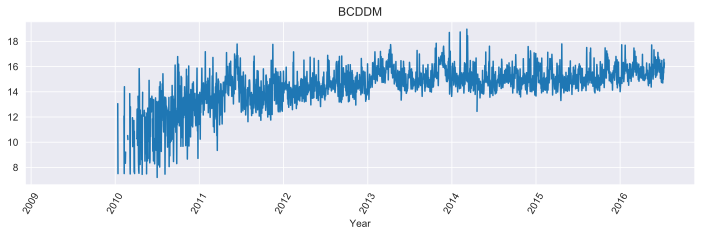

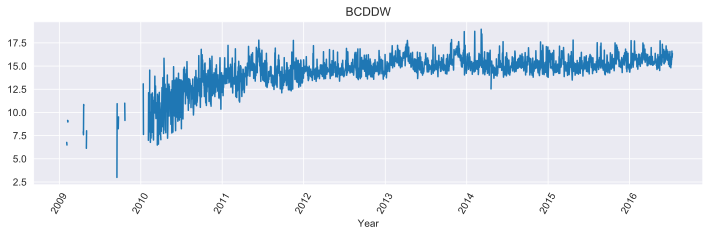

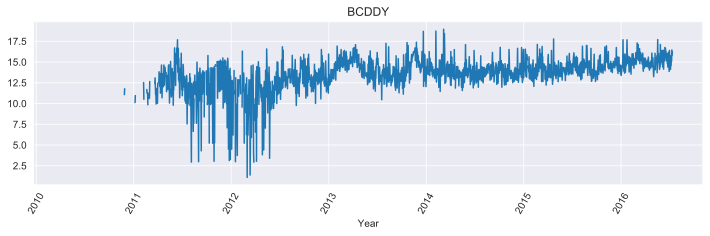

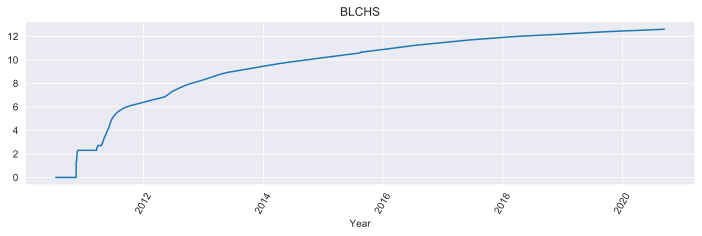

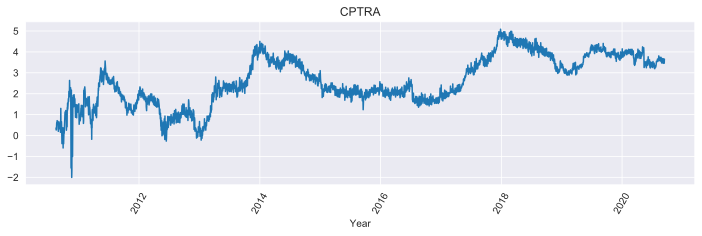

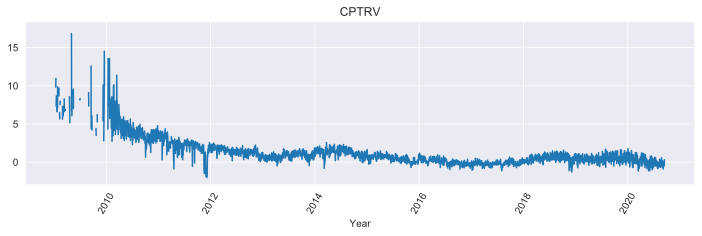

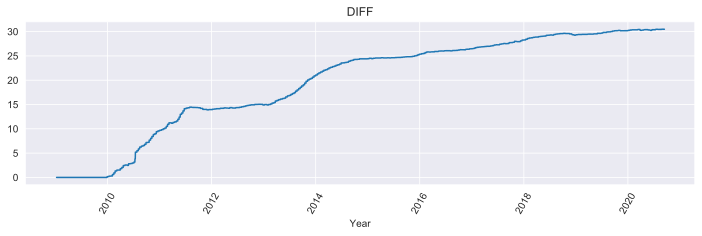

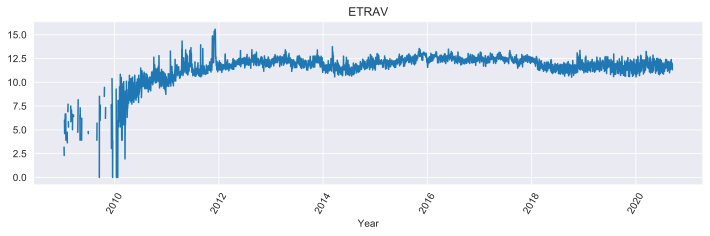

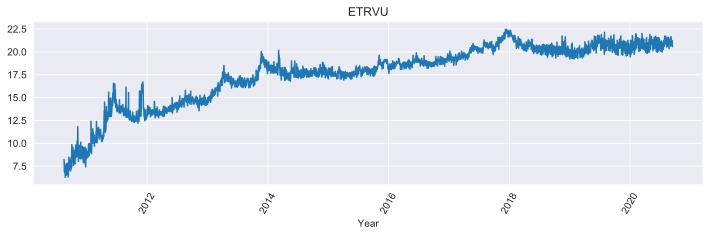

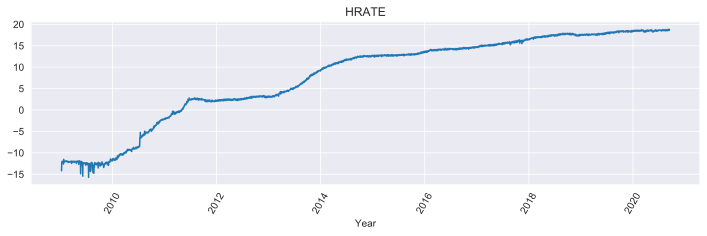

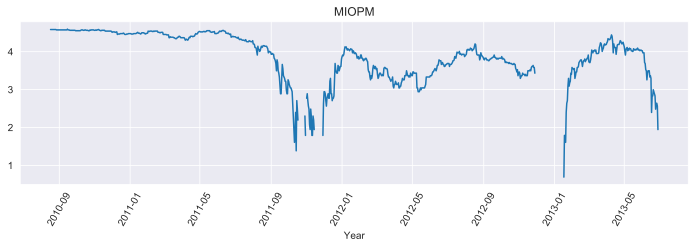

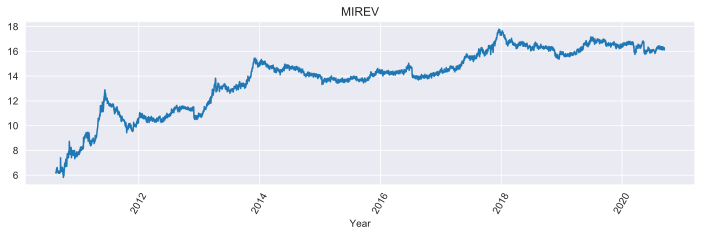

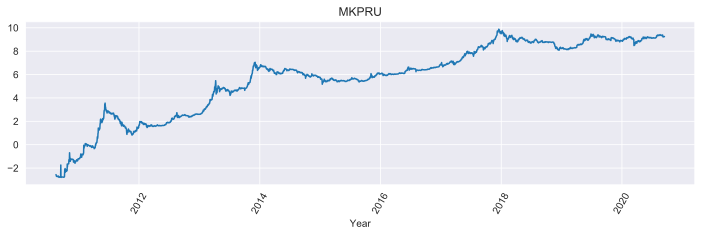

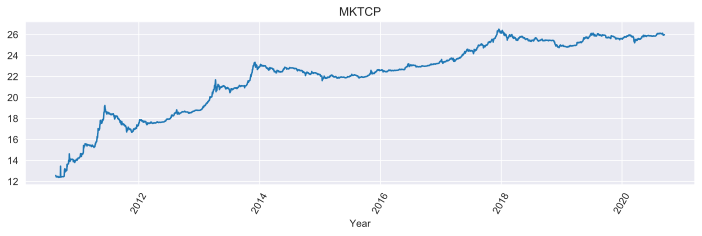

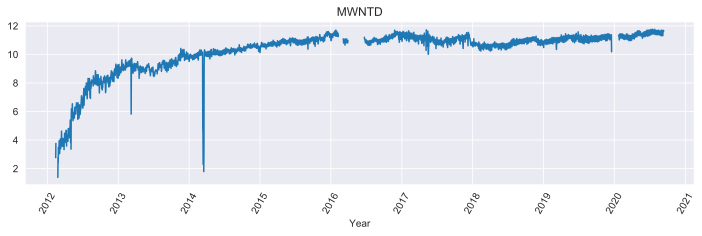

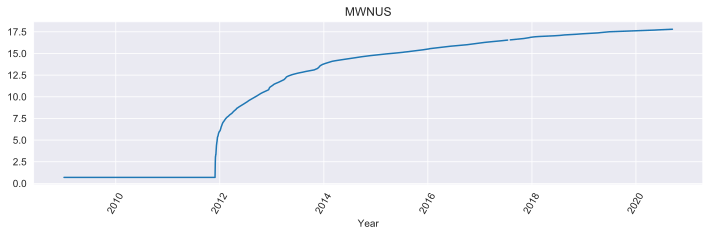

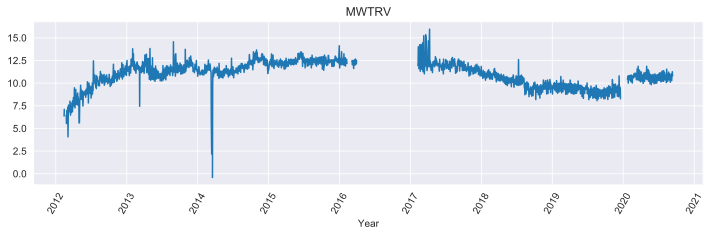

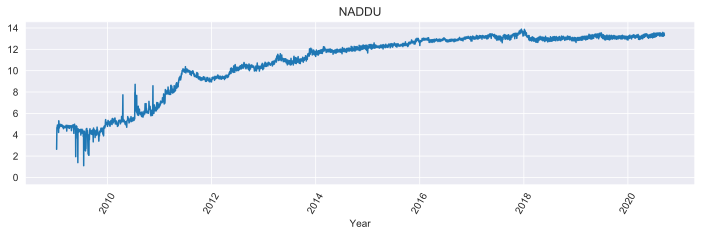

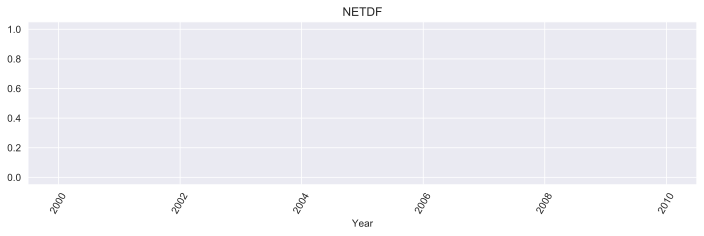

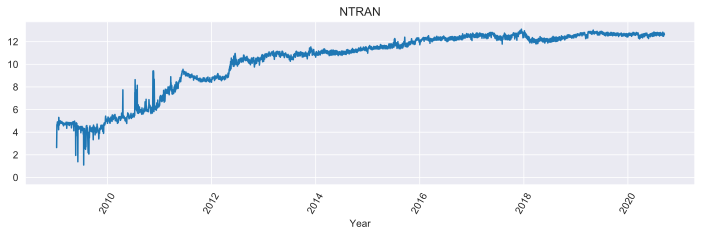

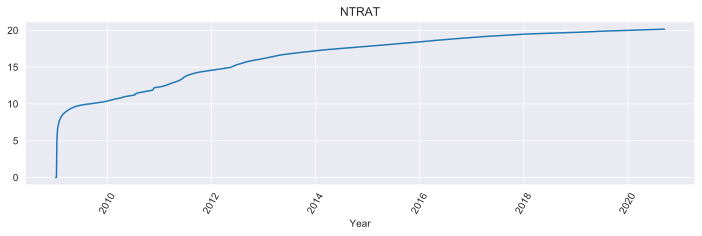

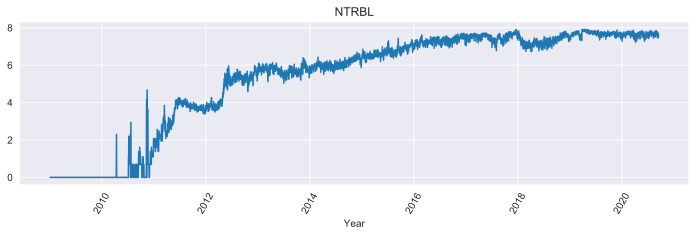

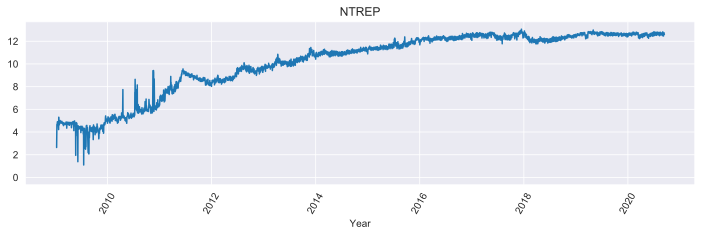

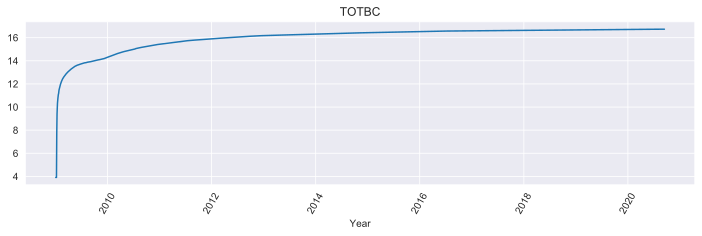

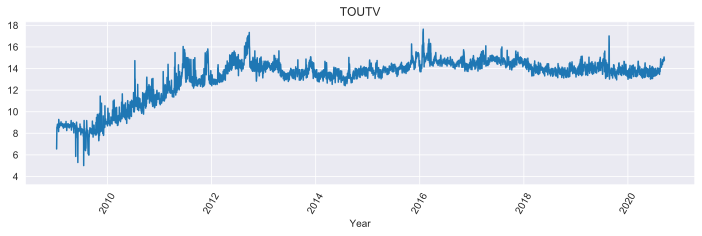

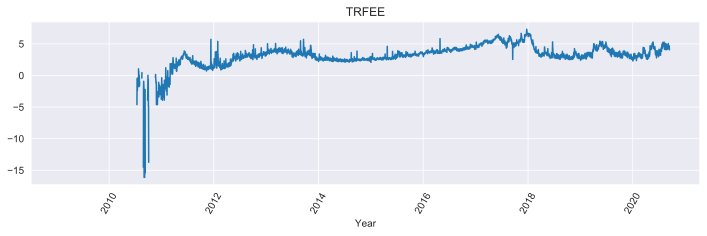

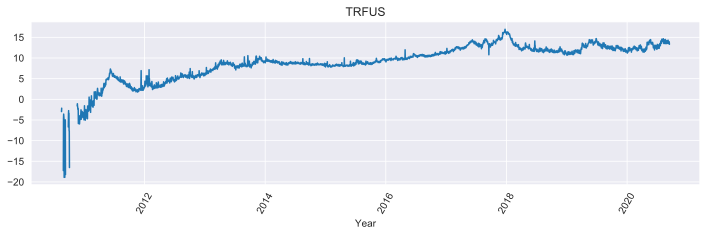

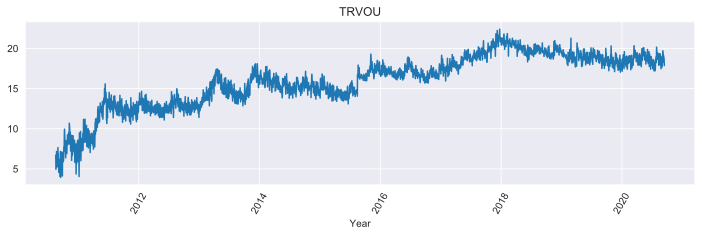

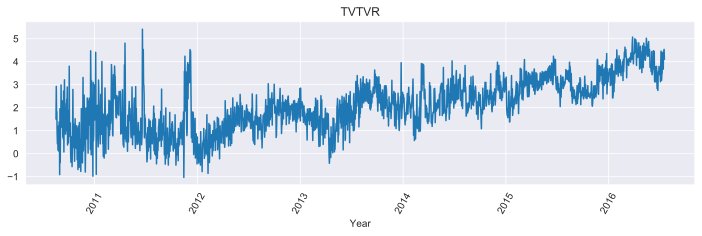

In [185]:
# Plots for all the variables in the btc dataset.
for i in list(df_normalized.columns):
    plt.figure(figsize=(12,3))
    plt.xticks(rotation=60)
    plt.title(i)
    plt.xlabel('Year', fontsize=10)
    plt.plot(np.log(df[i]))